# SVM(Support Vector Machine) and KNN (K-Nearest-Neighbors)

In [1]:
from warnings import filterwarnings

filterwarnings("ignore")

# Step 1 - Data ingestion

In [3]:
import pandas as pd

df = pd.read_csv("drug200 (1).csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df["Drug"].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

# Target Feature - Drug
#Multclass classification problem

# Step 2 - Perfom basic data quality checks

In [5]:
df.shape

(200, 6)

In [6]:
df.info

<bound method DataFrame.info of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

In [7]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

# Step 3 - Seperate X and Y(Drug)

In [9]:
X = df.drop(columns=["Drug"])
Y = df["Drug"]

In [10]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [11]:
Y.head()

0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
Name: Drug, dtype: object

In [12]:
Y.value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

<Axes: xlabel='Drug'>

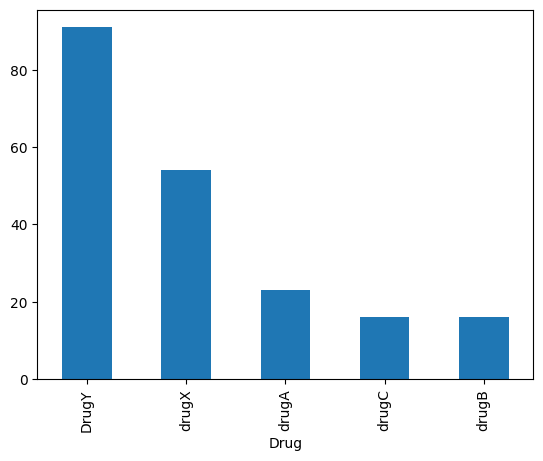

In [13]:
Y.value_counts().plot(kind="bar")

In [14]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.4, random_state=42)

In [15]:
xtrain.head()

,Age,Sex,BP,Cholesterol,Na_to_K
2,47,M,LOW,HIGH,10.114
77,26,F,HIGH,NORMAL,19.161
46,37,F,HIGH,HIGH,13.091
187,47,M,HIGH,HIGH,10.403
191,23,M,HIGH,HIGH,8.011


In [16]:
ytrain.head()

2      drugC
77     DrugY
46     drugA
187    drugA
191    drugA
Name: Drug, dtype: object

In [17]:
xtest.head()

,Age,Sex,BP,Cholesterol,Na_to_K
95,36,M,LOW,NORMAL,11.424
15,16,F,HIGH,NORMAL,15.516
30,18,F,NORMAL,NORMAL,8.750
158,59,F,LOW,HIGH,10.444
128,47,M,LOW,NORMAL,33.542


In [18]:
ytest.head()

95     drugX
15     DrugY
30     drugX
158    drugC
128    DrugY
Name: Drug, dtype: object

In [19]:
xtest.shape

(80, 5)

# Step 5 - Preprocessing on xtrain, xtest

In [21]:
X.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
dtype: object

In [22]:
cat_cols = X.select_dtypes(include="object").columns.tolist()
cat_cols

['Sex', 'BP', 'Cholesterol']

In [23]:
num_cols = X.select_dtypes(include="number").columns.tolist()
num_cols

['Age', 'Na_to_K']

In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [25]:
num_pipe = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [26]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first"),
)

In [27]:
pre = ColumnTransformer(
    [("num", num_pipe, num_cols), ("cat", cat_pipe, cat_cols)]
).set_output(transform="pandas")

pre.fit(xtrain)

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [28]:
xtrain_pre = pre.transform(xtrain)
xtrain_pre.head()

,num__Age,num__Na_to_K,cat__Sex_M,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_NORMAL
2,0.117624,-0.884625,1.0,1.0,0.0,0.0
77,-1.165548,0.420766,0.0,0.0,0.0,1.0
46,-0.493410,-0.455074,0.0,0.0,0.0,0.0
187,0.117624,-0.842925,1.0,0.0,0.0,0.0
191,-1.348858,-1.188066,1.0,0.0,0.0,0.0


In [29]:
xtest_pre = pre.transform(xtest)
xtest_pre.head()

,num__Age,num__Na_to_K,cat__Sex_M,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_NORMAL
95,-0.554514,-0.695605,1.0,1.0,0.0,1.0
15,-1.776582,-0.105171,0.0,0.0,0.0,1.0
30,-1.654375,-1.081436,0.0,0.0,1.0,1.0
158,0.850865,-0.837009,0.0,1.0,0.0,0.0
128,0.117624,2.495800,1.0,1.0,0.0,1.0


# Step 6 - Model Building
# KNN Model

In [30]:
from sklearn.neighbors import KNeighborsClassifier

model1 = KNeighborsClassifier(n_neighbors=40)
model1.fit(xtrain_pre, ytrain)

,n_neighbors,40
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [31]:
model1.score(xtrain_pre, ytrain)

0.6583333333333333

In [32]:
model1.score(xtest_pre, ytest)

0.65

# Hyperparemeter tuning

In [33]:
df["Drug"].nunique()

5

In [34]:
# Gridsearch is suitable for single parameter tuning
from sklearn.model_selection import GridSearchCV

params = {"n_neighbors": [6, 7, 8, 9, 10, 11, 12, 13]}
knn = KNeighborsClassifier()
gscv = GridSearchCV(knn, params, cv=5, scoring="f1_macro")
gscv.fit(xtrain_pre, ytrain)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [6, 7, ...]}"
,scoring,'f1_macro'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,8


In [35]:
gscv.best_params_

{'n_neighbors': 8}

In [36]:
gscv.best_score_

np.float64(0.8484805050022443)

In [37]:
best_knn = gscv.best_estimator_
best_knn

,n_neighbors,8
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [38]:
best_knn.score(xtrain_pre, ytrain)

0.9083333333333333

# SVM - Support Vector machines

In [39]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

model_svm = SVC(probability=True)
scores = cross_val_score(model_svm, xtrain_pre, ytrain, cv=5, scoring="f1_macro")
scores

array([0.92533333, 0.94461538, 0.92515152, 0.87788443, 0.84463768])

In [40]:
scores.mean()

np.float64(0.9035244697331655)

In [41]:
scores.std()

np.float64(0.036761077761714854)

# From above it is clear SVM model performs better on this dataset

In [42]:
model_svm.fit(xtrain_pre, ytrain)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [43]:
model_svm.score(xtrain_pre, ytrain)

0.9916666666666667

In [44]:
model_svm.score(xtest_pre, ytest)

0.9875

# Step 7 - Evaluate Best model in detail

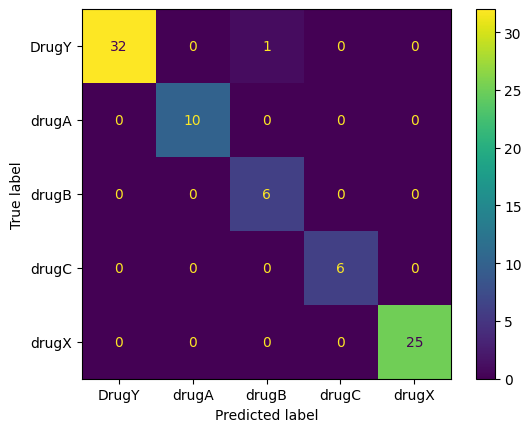

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model_svm, xtest_pre, ytest)

In [46]:
from sklearn.metrics import classification_report

ypred_test = model_svm.predict(xtest_pre)
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

       DrugY       1.00      0.97      0.98        33
       drugA       1.00      1.00      1.00        10
       drugB       0.86      1.00      0.92         6
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        25

    accuracy                           0.99        80
   macro avg       0.97      0.99      0.98        80
weighted avg       0.99      0.99      0.99        80




# Above data clearly has f1_macro > 0.8
# Step 8 - Out of Sample prediction (Model Inference)

In [48]:
xnew = pd.read_csv("drugtest (1).csv")
xnew

,Age,Sex,BP,Cholesterol,Na_to_K
0,37.0,F,HIGH,HIGH,13.091
1,NaN,F,HIGH,HIGH,12.894
2,23.0,M,NaN,HIGH,31.686
3,31.0,M,HIGH,HIGH,30.366
4,39.0,M,HIGH,HIGH,9.664
5,16.0,M,LOW,HIGH,12.006
6,33.0,F,LOW,HIGH,NaN
7,59.0,M,HIGH,HIGH,NaN
8,68.0,M,LOW,HIGH,10.291
9,30.0,F,NORMAL,HIGH,10.443


In [49]:
pre

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [50]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__Age,num__Na_to_K,cat__Sex_M,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_NORMAL
0,-0.493410,-0.455074,0.0,0.0,0.0,0.0
1,0.087072,-0.483499,0.0,0.0,0.0,0.0
2,-1.348858,2.227998,1.0,0.0,0.0,0.0
3,-0.860031,2.037535,1.0,0.0,0.0,0.0
4,-0.371203,-0.949555,1.0,0.0,0.0,0.0


In [51]:
preds = model_svm.predict(xnew_pre)
preds

array(['drugA', 'drugA', 'DrugY', 'DrugY', 'drugA', 'drugC', 'drugC',
       'drugB', 'drugC', 'drugX', 'drugC', 'drugA', 'drugX', 'DrugY',
       'drugA', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugX', 'DrugY',
       'drugX', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'DrugY', 'DrugY', 'DrugY', 'drugC', 'DrugY', 'drugC',
       'DrugY', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'drugX', 'DrugY',
       'DrugY', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'DrugY',
       'drugC'], dtype=object)

In [52]:
probs = model_svm.predict_proba(xnew_pre)
probs[0:5]

array([[0.06856943, 0.84501449, 0.0154386 , 0.04572238, 0.0252551 ],
       [0.08055162, 0.71957836, 0.1139615 , 0.05035327, 0.03555525],
       [0.9462276 , 0.00647299, 0.00854037, 0.01240473, 0.02635432],
       [0.97004306, 0.00407949, 0.00503661, 0.00745258, 0.01338826],
       [0.00579624, 0.934614  , 0.01236789, 0.0325103 , 0.01471156]])

In [53]:
model_svm.classes_

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

In [54]:
xnew["Drug"] = preds
xnew[model_svm.classes_] = probs.round(4)

In [55]:
xnew

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,DrugY,drugA,drugB,drugC,drugX
0,37.0,F,HIGH,HIGH,13.091,drugA,0.0686,0.8450,0.0154,0.0457,0.0253
1,NaN,F,HIGH,HIGH,12.894,drugA,0.0806,0.7196,0.1140,0.0504,0.0356
2,23.0,M,NaN,HIGH,31.686,DrugY,0.9462,0.0065,0.0085,0.0124,0.0264
3,31.0,M,HIGH,HIGH,30.366,DrugY,0.9700,0.0041,0.0050,0.0075,0.0134
4,39.0,M,HIGH,HIGH,9.664,drugA,0.0058,0.9346,0.0124,0.0325,0.0147
5,16.0,M,LOW,HIGH,12.006,drugC,0.0415,0.0245,0.0140,0.8831,0.0369
6,33.0,F,LOW,HIGH,NaN,drugC,0.2063,0.0334,0.0107,0.6894,0.0602
7,59.0,M,HIGH,HIGH,NaN,drugB,0.1187,0.0750,0.7461,0.0370,0.0232
8,68.0,M,LOW,HIGH,10.291,drugC,0.0752,0.0129,0.0715,0.8033,0.0371
9,30.0,F,NORMAL,HIGH,10.443,drugX,0.0252,0.0344,0.0079,0.0239,0.9086


In [56]:
xnew.to_csv("results.csv", index=False)

# Step 9 - Save the model object

In [57]:
pre

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [58]:
model_svm

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [59]:
import joblib

joblib.dump(pre, "pre.joblib")

['pre.joblib']

In [60]:
joblib.dump(model_svm, "svm_model.joblib")

['svm_model.joblib']

In [61]:
m = joblib.load("svm_model.joblib")
m

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [62]:
m.score(xtrain_pre, ytrain)

0.9916666666666667

In [63]:
m.score(xtest_pre, ytest)

0.9875